In [ ]:
from datasets import load_dataset

ds = load_dataset("baconnier/administration_multi-term-dataset", split="train")  # charge le split train[][]
df = ds.to_pandas()  # conversion en DataFrame pandas[]
df.to_csv("administration_multi-term-dataset.csv", index=False)  # export CSV[]


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/55.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/135020 [00:00<?, ? examples/s]

🔄 Chargement du dataset : baconnier/administration_multi-term-dataset...
✅ Dataset chargé. Split analysé : 'train' (135020 lignes)

📋 APERÇU DES DONNÉES (5 premières lignes)
                                                term  \
0      [contrat commutatif, infantile, pareillement]   
1      [contrat commutatif, infantile, pareillement]   
2      [contrat commutatif, infantile, pareillement]   
3  [Demande de renseignements, arguer;argüer, les...   
4  [Demande de renseignements, arguer;argüer, les...   

                                          definition  \
0  [Un contrat commutatif est un type d'accord lé...   
1  [Un contrat commutatif est un type d'accord lé...   
2  [Un contrat commutatif est un type d'accord lé...   
3  [Une demande de renseignements est une requête...   
4  [Une demande de renseignements est une requête...   

                                              prompt  \
0  Comment rédiger un contrat commutatif pour un ...   
1  Quelle est la procédure pour établir 

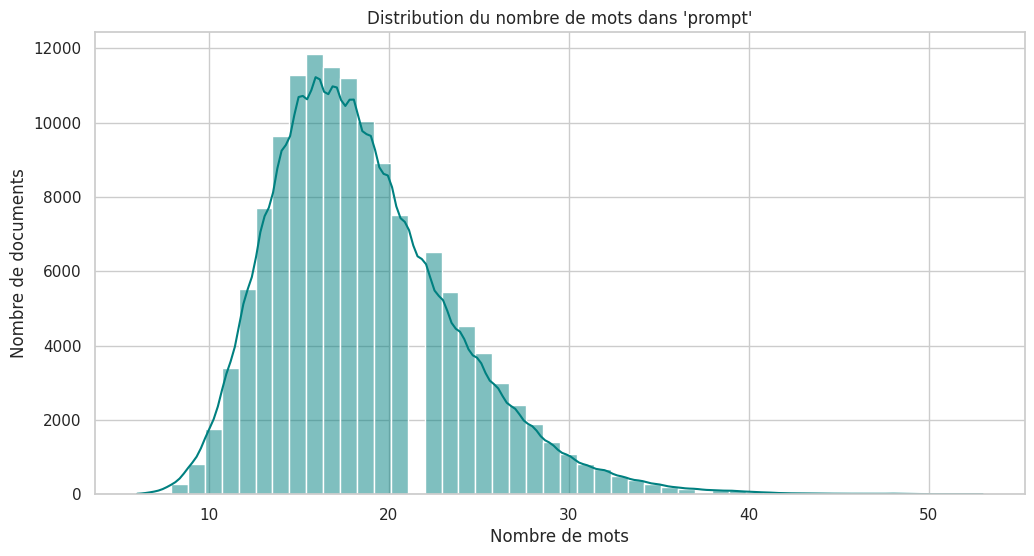

   -> Longueur moyenne : 18.58 mots
   -> Longueur médiane : 18.00 mots
   -> Max mots : 53

🏷️ Colonne de termes/labels identifiée : 'term'


/tmp/ipython-input-4067373978.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['num_terms'], palette="viridis")


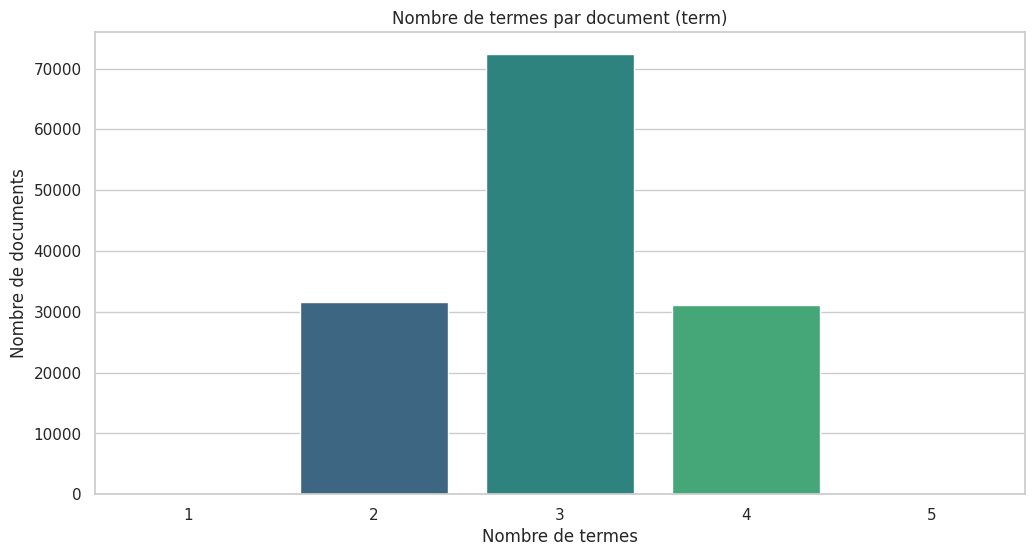

   -> Nombre total de termes uniques (vocabulaire labels) : 3629
   -> Top 10 termes les plus fréquents : [('d’office', 193), ('se rétracter', 183), ('lato sensu', 183), ('en vertu de', 180), ('se maintenir', 180), ('arguer', 180), ('se répercuter', 174), ('au demeurant', 174), ('confidentiellement', 174), ('enclavé', 174)]


/tmp/ipython-input-4067373978.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_terms, y='Term', x='Count', palette='magma')


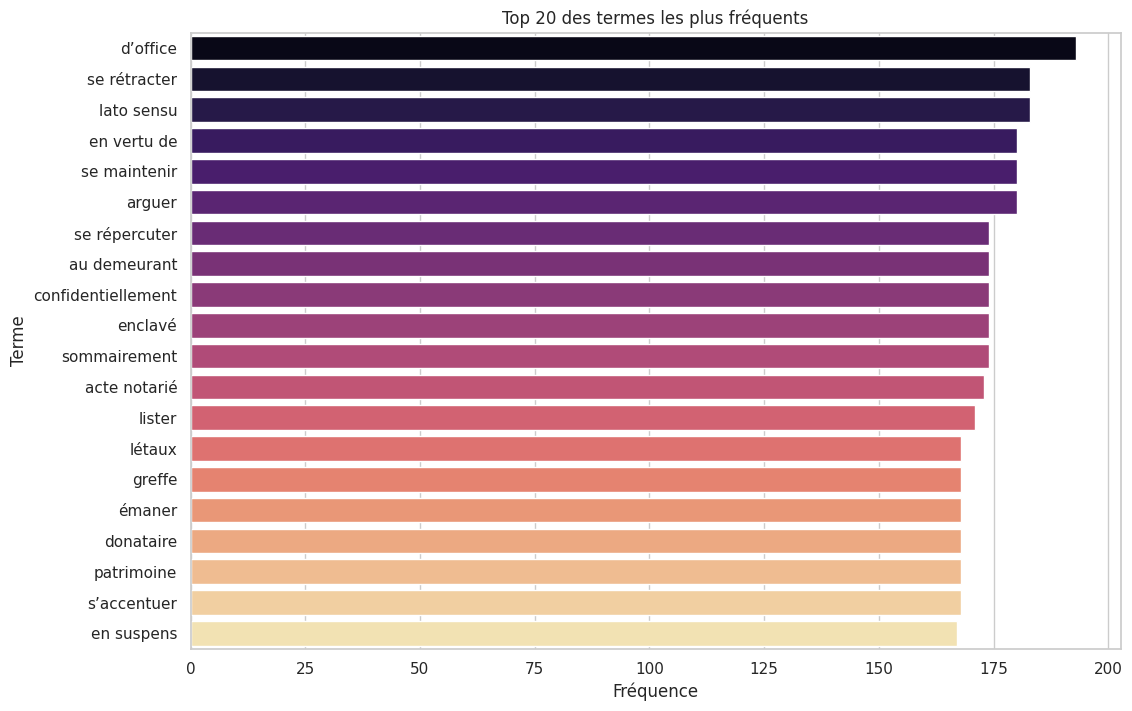

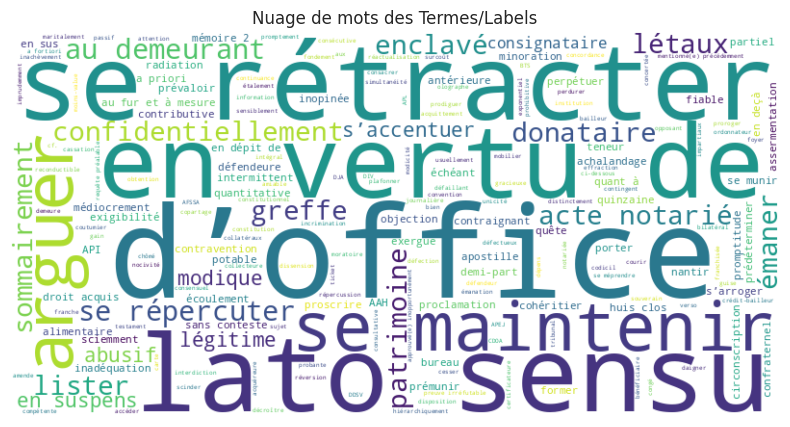

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from collections import Counter
from wordcloud import WordCloud
import numpy as np

# Configuration pour un affichage propre
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

def analyze_dataset(dataset_name):
    print(f"🔄 Chargement du dataset : {dataset_name}...")
    try:
        # Chargement du dataset
        ds = load_dataset(dataset_name)

        # On prend le split 'train' par défaut, sinon le premier disponible
        split_name = 'train' if 'train' in ds else list(ds.keys())[0]
        data = ds[split_name]

        # Conversion en Pandas DataFrame pour faciliter l'analyse
        df = data.to_pandas()
        print(f"✅ Dataset chargé. Split analysé : '{split_name}' ({len(df)} lignes)")

        # 1. Aperçu des données
        print("\n" + "="*40)
        print("📋 APERÇU DES DONNÉES (5 premières lignes)")
        print("="*40)
        print(df.head())

        print("\n" + "="*40)
        print("ℹ️ INFORMATIONS STRUCTURELLES")
        print("="*40)
        print(df.info())

        # Identification automatique des colonnes (Text vs Listes de termes)
        # On suppose que la colonne contenant des listes est celle des labels/termes
        list_cols = [col for col in df.columns if isinstance(df[col].iloc[0], (list, np.ndarray))]
        text_cols = [col for col in df.columns if isinstance(df[col].iloc[0], str) and len(df[col].iloc[0]) > 20]

        target_col = list_cols[0] if list_cols else None
        text_col = text_cols[0] if text_cols else None

        if text_col:
            print(f"\n📝 Colonne de texte identifiée : '{text_col}'")
            # Analyse de la longueur des textes
            df['text_length'] = df[text_col].apply(len)
            df['word_count'] = df[text_col].apply(lambda x: len(str(x).split()))

            # Plot distribution longueur
            plt.figure()
            sns.histplot(df['word_count'], bins=50, kde=True, color='teal')
            plt.title(f"Distribution du nombre de mots dans '{text_col}'")
            plt.xlabel("Nombre de mots")
            plt.ylabel("Nombre de documents")
            plt.show()

            print(f"   -> Longueur moyenne : {df['word_count'].mean():.2f} mots")
            print(f"   -> Longueur médiane : {df['word_count'].median():.2f} mots")
            print(f"   -> Max mots : {df['word_count'].max()}")

        if target_col:
            print(f"\n🏷️ Colonne de termes/labels identifiée : '{target_col}'")

            # Analyse du nombre de termes par document
            df['num_terms'] = df[target_col].apply(len)

            plt.figure()
            sns.countplot(x=df['num_terms'], palette="viridis")
            plt.title(f"Nombre de termes par document ({target_col})")
            plt.xlabel("Nombre de termes")
            plt.ylabel("Nombre de documents")
            plt.show()

            # Aplatir la liste de tous les termes pour compter les occurrences
            all_terms = [term for sublist in df[target_col] for term in sublist]
            term_counts = Counter(all_terms)

            print(f"   -> Nombre total de termes uniques (vocabulaire labels) : {len(term_counts)}")
            print(f"   -> Top 10 termes les plus fréquents : {term_counts.most_common(10)}")

            # Visualisation des Top 20 Termes
            common_terms = pd.DataFrame(term_counts.most_common(20), columns=['Term', 'Count'])

            plt.figure(figsize=(12, 8))
            sns.barplot(data=common_terms, y='Term', x='Count', palette='magma')
            plt.title("Top 20 des termes les plus fréquents")
            plt.xlabel("Fréquence")
            plt.ylabel("Terme")
            plt.show()

            # WordCloud des termes
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_counts)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title("Nuage de mots des Termes/Labels")
            plt.show()

    except Exception as e:
        print(f"❌ Une erreur est survenue : {e}")

# Lancer l'analyse
if __name__ == "__main__":
    analyze_dataset("baconnier/administration_multi-term-dataset")

⏳ Initialisation...
✅ Mode : GPU 🚀

📥 Chargement du dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/55.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/135020 [00:00<?, ? examples/s]

   ✂️ Limitation à 300 exemples aléatoires (sur 135020) pour la vitesse.
   ✅ 300 paires prêtes pour le test.

🚀 Démarrage du comparatif RAPIDE sur 6 modèles...
⚙️  Chargement : Solon-Large (FR)...


config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

   📊 Score Top-1 : 79.7%  (Top-5 : 92.0%)
⚙️  Chargement : Snowflake Arctic-M...


config.json:   0%|          | 0.00/971 [00:00<?, ?B/s]

configuration_hf_alibaba_nlp_gte.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Snowflake/snowflake-arctic-embed-m-v2.0:
- configuration_hf_alibaba_nlp_gte.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


The repository Snowflake/snowflake-arctic-embed-m-v2.0 contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/Snowflake/snowflake-arctic-embed-m-v2.0 .
 You can inspect the repository content at https://hf.co/Snowflake/snowflake-arctic-embed-m-v2.0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y
   ❌ Erreur Load : Transformer._load_model() got multiple values for argument 'config'
⚙️  Chargement : BGE-M3...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

   📊 Score Top-1 : 77.3%  (Top-5 : 90.7%)
⚙️  Chargement : E5-Large...


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

   📊 Score Top-1 : 78.7%  (Top-5 : 95.7%)
⚙️  Chargement : GTE-Multi-Base...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/55.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/611M [00:00<?, ?B/s]

Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

   📊 Score Top-1 : 67.7%  (Top-5 : 82.7%)
⚙️  Chargement : E5-Small...


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

   📊 Score Top-1 : 55.7%  (Top-5 : 74.3%)

🏆 CLASSEMENT FINAL 🏆
| Modèle           |   Précision (Top-1) |   Précision (Top-5) |
|:-----------------|--------------------:|--------------------:|
| Solon-Large (FR) |                79.7 |                92.0 |
| E5-Large         |                78.7 |                95.7 |
| BGE-M3           |                77.3 |                90.7 |
| GTE-Multi-Base   |                67.7 |                82.7 |
| E5-Small         |                55.7 |                74.3 |


/tmp/ipython-input-391264492.py:192: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Précision (Top-1)", y="Modèle", palette=df["Color"].tolist())


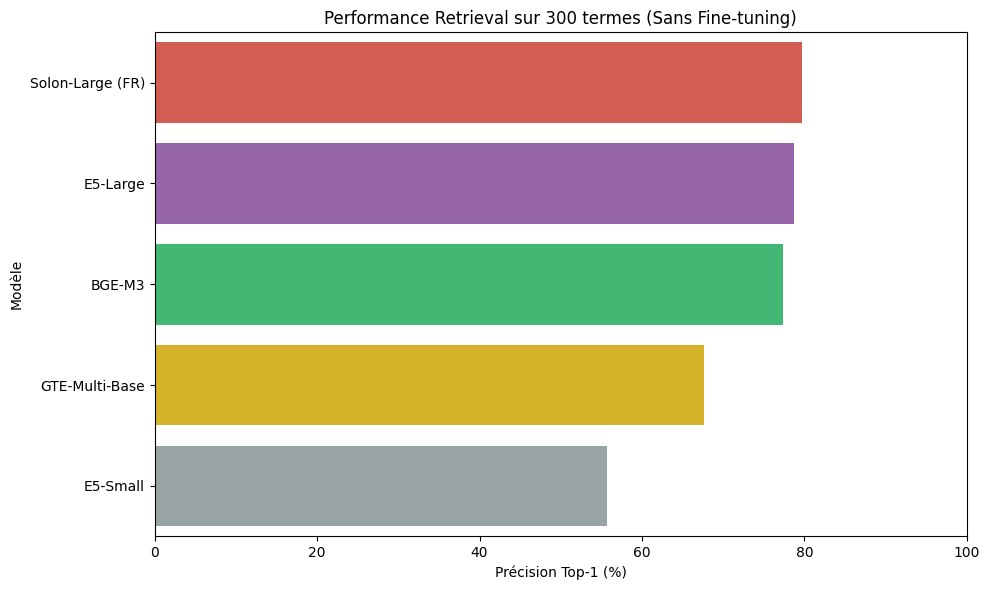

In [ ]:
# ==========================================
# 🚀 BENCHMARK "TURBO" - QUALITÉ PURE (SANS ENTRAÎNEMENT)
# ==========================================

import os
import sys
import gc
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import random

# 1. SETUP
print("⏳ Initialisation...")
os.environ["WANDB_DISABLED"] = "true"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Installation auto
def install(package):
    os.system(f'{sys.executable} -m pip install -q {package}')

try:
    import datasets
    from sentence_transformers import SentenceTransformer, util, models
    from transformers import AutoConfig, AutoModel
except ImportError:
    print("   📦 Installation des dépendances...")
    install('sentence-transformers datasets pandas matplotlib seaborn scikit-learn')
    import datasets
    from sentence_transformers import SentenceTransformer, util, models
    from transformers import AutoConfig, AutoModel

# 2. CONFIGURATION RAPIDE
MAX_SAMPLES = 300  # ⚠️ Limite le nombre de tests pour aller vite (mettez None pour tout tester)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"✅ Mode : {'GPU 🚀' if DEVICE == 'cuda' else 'CPU 🐢 (Plus lent)'}")

# ==========================================
# 3. CHARGEMENT DATASET
# ==========================================
print("\n📥 Chargement du dataset...")
try:
    dataset = datasets.load_dataset("baconnier/administration_multi-term-dataset", split="train")

    # Conversion rapide en liste
    cols = dataset.column_names
    col_terme = next((c for c in cols if 'term' in c.lower() or 'mot' in c.lower()), cols[0])
    col_def = next((c for c in cols if 'def' in c.lower() or 'desc' in c.lower()), cols[1] if len(cols)>1 else cols[0])

    FULL_QA = []
    for row in dataset:
        t = str(row[col_terme]).strip()
        d = str(row[col_def]).strip()
        if t and d:
            FULL_QA.append((f"C'est quoi {t} ?", d))

    # Sampling pour la vitesse
    if MAX_SAMPLES and len(FULL_QA) > MAX_SAMPLES:
        print(f"   ✂️ Limitation à {MAX_SAMPLES} exemples aléatoires (sur {len(FULL_QA)}) pour la vitesse.")
        DATASET_QA = random.sample(FULL_QA, MAX_SAMPLES)
    else:
        DATASET_QA = FULL_QA

    print(f"   ✅ {len(DATASET_QA)} paires prêtes pour le test.")

except Exception as e:
    print(f"❌ Erreur Dataset : {e}")
    DATASET_QA = []

# ==========================================
# 4. LISTE DES CANDIDATS
# ==========================================
CANDIDATS = [
    {"name": "Solon-Large (FR)", "id": "OrdalieTech/SOLON-embeddings-large-0.1", "color": "#e74c3c"},
    {"name": "Snowflake Arctic-M", "id": "Snowflake/snowflake-arctic-embed-m-v2.0", "color": "#3498db"},
    {"name": "BGE-M3", "id": "BAAI/bge-m3", "color": "#2ecc71"},
    {"name": "E5-Large", "id": "intfloat/multilingual-e5-large", "color": "#9b59b6"},
    {"name": "GTE-Multi-Base", "id": "Alibaba-NLP/gte-multilingual-base", "trust": True, "color": "#f1c40f"},
    {"name": "E5-Small", "id": "intfloat/multilingual-e5-small", "color": "#95a5a6"},
]

# ==========================================
# 5. FONCTIONS OPTIMISÉES
# ==========================================
def load_model_fast(cand):
    """Charge le modèle sans fioritures."""
    print(f"⚙️  Chargement : {cand['name']}...")
    try:
        # Load args légers
        kw = {"torch_dtype": torch.float16} if DEVICE == "cuda" else {}

        if "Snowflake" in cand['name']:
            # Fix Snowflake
            config = AutoConfig.from_pretrained(cand['id'], trust_remote_code=True)
            config.use_memory_efficient_attention = False
            config.unpad_inputs = False
            word_emb = models.Transformer(cand['id'], model_args={"config": config, "trust_remote_code": True, **kw})
            pooling = models.Pooling(word_emb.get_word_embedding_dimension(), pooling_mode='cls')
            return SentenceTransformer(modules=[word_emb, pooling], device=DEVICE)

        elif "Solon" in cand['name']:
            word_emb = models.Transformer(cand['id'], model_args=kw)
            pooling = models.Pooling(word_emb.get_word_embedding_dimension(), pooling_mode='mean')
            return SentenceTransformer(modules=[word_emb, pooling], device=DEVICE)

        else:
            trust = cand.get('trust', False)
            return SentenceTransformer(cand['id'], trust_remote_code=trust, device=DEVICE, model_kwargs=kw)

    except Exception as e:
        print(f"   ❌ Erreur Load : {e}")
        return None

def run_retrieval_test(model, model_name):
    """
    Test de Recherche pure : Le modèle retrouve-t-il la bonne définition ?
    """
    questions = [x[0] for x in DATASET_QA]
    reponses = [x[1] for x in DATASET_QA]

    # Préfixes pour E5
    p_q = "query: " if "E5" in model_name else ""
    p_d = "passage: " if "E5" in model_name else ""

    # Encodage (Batch auto géré par sentence-transformers)
    # C'est l'étape la plus longue mais on ne la fait qu'une fois
    emb_q = model.encode([p_q + q for q in questions], convert_to_tensor=True, show_progress_bar=True, batch_size=32)
    emb_r = model.encode([p_d + r for r in reponses], convert_to_tensor=True, show_progress_bar=True, batch_size=32)

    # Calcul de similarité (Matrix Multiplication)
    scores = util.cos_sim(emb_q, emb_r)

    top1 = 0
    top5 = 0
    n = len(questions)

    # Analyse des résultats
    for i in range(n):
        # On regarde les 5 meilleures réponses proposées par le modèle pour la question i
        best_indices = torch.topk(scores[i], k=5).indices.tolist()

        if i == best_indices[0]:
            top1 += 1
        if i in best_indices:
            top5 += 1

    return (top1 / n) * 100, (top5 / n) * 100

# ==========================================
# 6. EXÉCUTION
# ==========================================
results = []

if DATASET_QA:
    print(f"\n🚀 Démarrage du comparatif RAPIDE sur {len(CANDIDATS)} modèles...")

    for cand in CANDIDATS:
        # Nettoyage RAM
        gc.collect()
        torch.cuda.empty_cache()

        model = load_model_fast(cand)

        if model:
            acc1, acc5 = run_retrieval_test(model, cand['name'])
            print(f"   📊 Score Top-1 : {acc1:.1f}%  (Top-5 : {acc5:.1f}%)")

            results.append({
                "Modèle": cand['name'],
                "Précision (Top-1)": acc1,
                "Précision (Top-5)": acc5,
                "Color": cand['color']
            })

        # Nettoyage immédiat
        del model
        gc.collect()
        torch.cuda.empty_cache()

    # ==========================================
    # 7. RÉSULTATS
    # ==========================================
    if results:
        df = pd.DataFrame(results).sort_values(by="Précision (Top-1)", ascending=False)

        print("\n🏆 CLASSEMENT FINAL 🏆")
        print(df[["Modèle", "Précision (Top-1)", "Précision (Top-5)"]].to_markdown(index=False, floatfmt=".1f"))

        # Graphique
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df, x="Précision (Top-1)", y="Modèle", palette=df["Color"].tolist())
        plt.title(f"Performance Retrieval sur {len(DATASET_QA)} termes (Sans Fine-tuning)")
        plt.xlabel("Précision Top-1 (%)")
        plt.xlim(0, 100)
        plt.tight_layout()
        plt.show()
    else:
        print("❌ Aucun résultat.")
else:
    print("❌ Dataset vide.")

⏳ Initialisation...
✅ Mode : GPU 🚀

📥 Chargement du dataset...
   ✂️ Limitation à 300 exemples aléatoires (sur 135020) pour la vitesse.
   ✅ 300 paires prêtes pour le test.

🚀 Démarrage du comparatif RAPIDE sur 6 modèles...
⚙️  Chargement : Solon-Large (FR)...


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

   📊 Score Top-1 : 78.7%  (Top-5 : 91.7%)
⚙️  Chargement : Snowflake Arctic-M...


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/203 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

modeling_hf_alibaba_nlp_gte.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Snowflake/snowflake-arctic-embed-m-v2.0:
- modeling_hf_alibaba_nlp_gte.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

   ❌ Erreur Load : please install xformers
      💡 Conseil : Installez xformers (pip install xformers) ou utilisez un environnement GPU.
⚙️  Chargement : BGE-M3...


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

   📊 Score Top-1 : 81.3%  (Top-5 : 92.0%)
⚙️  Chargement : E5-Large...


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

   📊 Score Top-1 : 82.3%  (Top-5 : 91.3%)
⚙️  Chargement : GTE-Multi-Base...


Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

   📊 Score Top-1 : 67.7%  (Top-5 : 81.3%)
⚙️  Chargement : E5-Small...


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

   📊 Score Top-1 : 57.0%  (Top-5 : 69.3%)

🏆 CLASSEMENT FINAL 🏆
| Modèle           |   Précision (Top-1) |   Précision (Top-5) |
|:-----------------|--------------------:|--------------------:|
| E5-Large         |                82.3 |                91.3 |
| BGE-M3           |                81.3 |                92.0 |
| Solon-Large (FR) |                78.7 |                91.7 |
| GTE-Multi-Base   |                67.7 |                81.3 |
| E5-Small         |                57.0 |                69.3 |


/tmp/ipython-input-2984600998.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Précision (Top-1)", y="Modèle", palette=df["Color"].tolist())


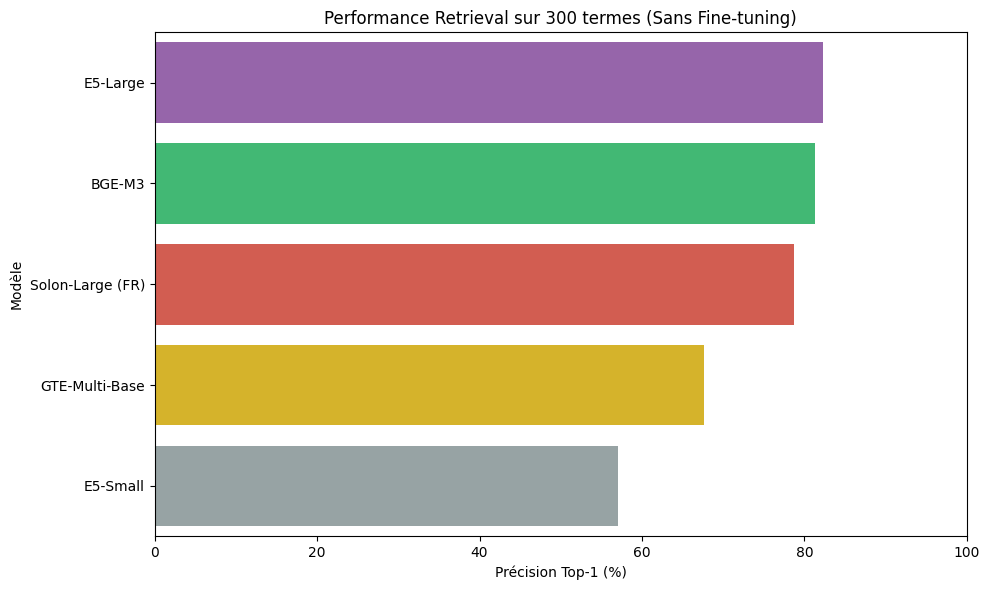

In [ ]:
# ==========================================
# 🚀 BENCHMARK "TURBO" - QUALITÉ PURE (SANS ENTRAÎNEMENT)
# ==========================================

import os
import sys
import gc
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import random

# 1. SETUP
print("⏳ Initialisation...")
os.environ["WANDB_DISABLED"] = "true"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Installation auto
def install(package):
    os.system(f'{sys.executable} -m pip install -q {package}')

try:
    import datasets
    from sentence_transformers import SentenceTransformer, util, models
    from transformers import AutoConfig, AutoModel
except ImportError:
    print("   📦 Installation des dépendances...")
    install('sentence-transformers datasets pandas matplotlib seaborn scikit-learn')
    import datasets
    from sentence_transformers import SentenceTransformer, util, models
    from transformers import AutoConfig, AutoModel

# 2. CONFIGURATION RAPIDE
MAX_SAMPLES = 300  # ⚠️ Limite le nombre de tests pour aller vite (mettez None pour tout tester)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"✅ Mode : {'GPU 🚀' if DEVICE == 'cuda' else 'CPU 🐢 (Plus lent)'}")

# ==========================================
# 3. CHARGEMENT DATASET
# ==========================================
print("\n📥 Chargement du dataset...")
try:
    dataset = datasets.load_dataset("baconnier/administration_multi-term-dataset", split="train")

    # Conversion rapide en liste
    cols = dataset.column_names
    col_terme = next((c for c in cols if 'term' in c.lower() or 'mot' in c.lower()), cols[0])
    col_def = next((c for c in cols if 'def' in c.lower() or 'desc' in c.lower()), cols[1] if len(cols)>1 else cols[0])

    FULL_QA = []
    for row in dataset:
        t = str(row[col_terme]).strip()
        d = str(row[col_def]).strip()
        if t and d:
            FULL_QA.append((f"C'est quoi {t} ?", d))

    # Sampling pour la vitesse
    if MAX_SAMPLES and len(FULL_QA) > MAX_SAMPLES:
        print(f"   ✂️ Limitation à {MAX_SAMPLES} exemples aléatoires (sur {len(FULL_QA)}) pour la vitesse.")
        DATASET_QA = random.sample(FULL_QA, MAX_SAMPLES)
    else:
        DATASET_QA = FULL_QA

    print(f"   ✅ {len(DATASET_QA)} paires prêtes pour le test.")

except Exception as e:
    print(f"❌ Erreur Dataset : {e}")
    DATASET_QA = []

# ==========================================
# 4. LISTE DES CANDIDATS
# ==========================================
CANDIDATS = [
    {"name": "Solon-Large (FR)", "id": "OrdalieTech/SOLON-embeddings-large-0.1", "color": "#e74c3c"},
    {"name": "Snowflake Arctic-M", "id": "Snowflake/snowflake-arctic-embed-m-v2.0", "color": "#3498db"},
    {"name": "BGE-M3", "id": "BAAI/bge-m3", "color": "#2ecc71"},
    {"name": "E5-Large", "id": "intfloat/multilingual-e5-large", "color": "#9b59b6"},
    {"name": "GTE-Multi-Base", "id": "Alibaba-NLP/gte-multilingual-base", "trust": True, "color": "#f1c40f"},
    {"name": "E5-Small", "id": "intfloat/multilingual-e5-small", "color": "#95a5a6"},
]

# ==========================================
# 5. FONCTIONS OPTIMISÉES
# ==========================================
def load_model_fast(cand):
    """Charge le modèle sans fioritures."""
    print(f"⚙️  Chargement : {cand['name']}...")
    try:
        # Load args légers
        kw = {"torch_dtype": torch.float16} if DEVICE == "cuda" else {}

        if "Snowflake" in cand['name']:
            # CHARGEMENT STANDARD ROBUSTE (Correction du bug de config)
            # On évite de passer un objet config complexe qui cause l'erreur 'dict object...'
            return SentenceTransformer(cand['id'], trust_remote_code=True, device=DEVICE, model_kwargs=kw)

        elif "Solon" in cand['name']:
            # Solon est un BERT standard, on utilise le chargement explicite pour être sûr du pooling
            word_emb = models.Transformer(cand['id'], model_args=kw)
            pooling = models.Pooling(word_emb.get_word_embedding_dimension(), pooling_mode='mean')
            return SentenceTransformer(modules=[word_emb, pooling], device=DEVICE)

        else:
            # Autres modèles (E5, BGE, GTE...)
            trust = cand.get('trust', False)
            return SentenceTransformer(cand['id'], trust_remote_code=trust, device=DEVICE, model_kwargs=kw)

    except Exception as e:
        print(f"   ❌ Erreur Load : {e}")
        # Si Snowflake échoue à cause de xformers, on donne un conseil
        if "Snowflake" in cand['name'] and "xformers" in str(e):
            print("      💡 Conseil : Installez xformers (pip install xformers) ou utilisez un environnement GPU.")
        return None

def run_retrieval_test(model, model_name):
    """
    Test de Recherche pure : Le modèle retrouve-t-il la bonne définition ?
    """
    questions = [x[0] for x in DATASET_QA]
    reponses = [x[1] for x in DATASET_QA]

    # Préfixes pour E5
    p_q = "query: " if "E5" in model_name else ""
    p_d = "passage: " if "E5" in model_name else ""

    # Encodage (Batch auto géré par sentence-transformers)
    # C'est l'étape la plus longue mais on ne la fait qu'une fois
    emb_q = model.encode([p_q + q for q in questions], convert_to_tensor=True, show_progress_bar=True, batch_size=32)
    emb_r = model.encode([p_d + r for r in reponses], convert_to_tensor=True, show_progress_bar=True, batch_size=32)

    # Calcul de similarité (Matrix Multiplication)
    scores = util.cos_sim(emb_q, emb_r)

    top1 = 0
    top5 = 0
    n = len(questions)

    # Analyse des résultats
    for i in range(n):
        # On regarde les 5 meilleures réponses proposées par le modèle pour la question i
        best_indices = torch.topk(scores[i], k=5).indices.tolist()

        if i == best_indices[0]:
            top1 += 1
        if i in best_indices:
            top5 += 1

    return (top1 / n) * 100, (top5 / n) * 100

# ==========================================
# 6. EXÉCUTION
# ==========================================
results = []

if DATASET_QA:
    print(f"\n🚀 Démarrage du comparatif RAPIDE sur {len(CANDIDATS)} modèles...")

    for cand in CANDIDATS:
        # Nettoyage RAM
        gc.collect()
        torch.cuda.empty_cache()

        model = load_model_fast(cand)

        if model:
            acc1, acc5 = run_retrieval_test(model, cand['name'])
            print(f"   📊 Score Top-1 : {acc1:.1f}%  (Top-5 : {acc5:.1f}%)")

            results.append({
                "Modèle": cand['name'],
                "Précision (Top-1)": acc1,
                "Précision (Top-5)": acc5,
                "Color": cand['color']
            })

        # Nettoyage immédiat
        del model
        gc.collect()
        torch.cuda.empty_cache()

    # ==========================================
    # 7. RÉSULTATS
    # ==========================================
    if results:
        df = pd.DataFrame(results).sort_values(by="Précision (Top-1)", ascending=False)

        print("\n🏆 CLASSEMENT FINAL 🏆")
        print(df[["Modèle", "Précision (Top-1)", "Précision (Top-5)"]].to_markdown(index=False, floatfmt=".1f"))

        # Graphique
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df, x="Précision (Top-1)", y="Modèle", palette=df["Color"].tolist())
        plt.title(f"Performance Retrieval sur {len(DATASET_QA)} termes (Sans Fine-tuning)")
        plt.xlabel("Précision Top-1 (%)")
        plt.xlim(0, 100)
        plt.tight_layout()
        plt.show()
    else:
        print("❌ Aucun résultat.")
else:
    print("❌ Dataset vide.")

# Test des modèles sur 500 échantillons

⏳ Initialisation...
✅ Mode : GPU 🚀

📥 Chargement du dataset...
   ✂️ Échantillon : 500 paires.

🚀 Démarrage du Benchmark...
⚙️  Chargement : Solon-Large...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

   📊 Solon-Large -> Top-1: 78.6% | Top-5: 92.0%
⚙️  Chargement : Snowflake-Arctic...


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/971 [00:00<?, ?B/s]

configuration_hf_alibaba_nlp_gte.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Snowflake/snowflake-arctic-embed-m-v2.0:
- configuration_hf_alibaba_nlp_gte.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_hf_alibaba_nlp_gte.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Snowflake/snowflake-arctic-embed-m-v2.0:
- modeling_hf_alibaba_nlp_gte.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

   📊 Snowflake-Arctic -> Top-1: 76.6% | Top-5: 89.4%
⚙️  Chargement : BGE-M3...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

   📊 BGE-M3 -> Top-1: 80.6% | Top-5: 91.8%
⚙️  Chargement : E5-Large...


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

   📊 E5-Large -> Top-1: 82.0% | Top-5: 93.0%
⚙️  Chargement : GTE-Multilingual...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/55.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/611M [00:00<?, ?B/s]

Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

   📊 GTE-Multilingual -> Top-1: 67.6% | Top-5: 81.2%
⚙️  Chargement : E5-Small...


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

   📊 E5-Small -> Top-1: 59.0% | Top-5: 69.8%

🏆 CLASSEMENT FINAL 🏆
| Modèle           |   Top-1 Accuracy |   Top-5 Accuracy |
|:-----------------|-----------------:|-----------------:|
| E5-Large         |             82.0 |             93.0 |
| BGE-M3           |             80.6 |             91.8 |
| Solon-Large      |             78.6 |             92.0 |
| Snowflake-Arctic |             76.6 |             89.4 |
| GTE-Multilingual |             67.6 |             81.2 |
| E5-Small         |             59.0 |             69.8 |


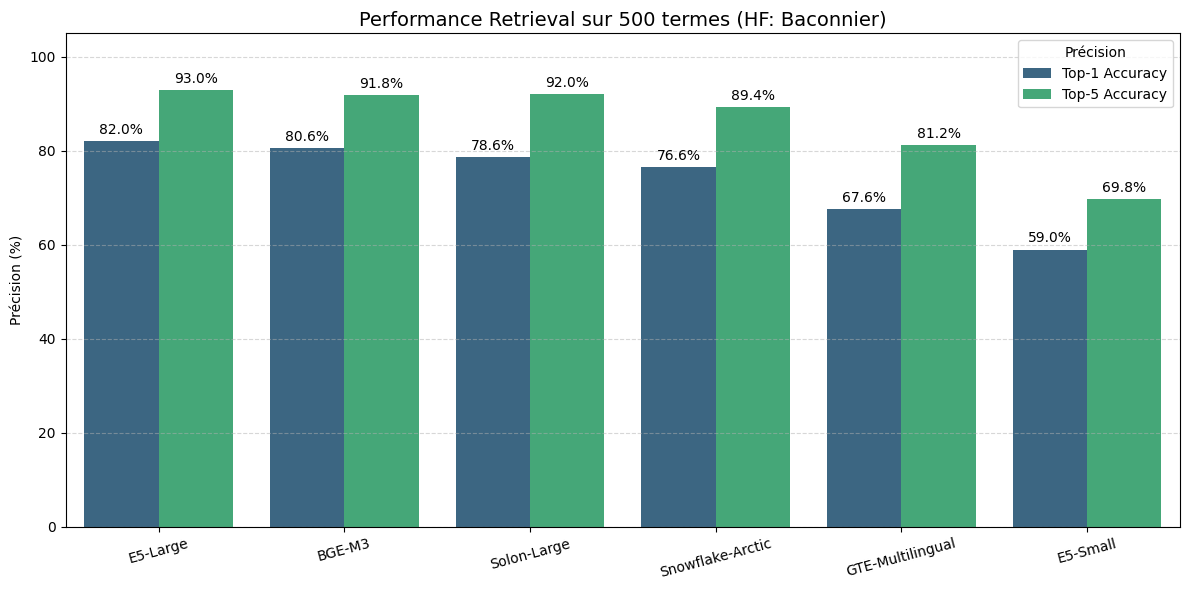

In [ ]:
# ==========================================
# 🚀 BENCHMARK COMPLET - DATASET BERCY
# ==========================================

import os
import sys
import gc
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

# 1. SETUP
print("⏳ Initialisation...")
os.environ["WANDB_DISABLED"] = "true"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

def install(package):
    os.system(f'{sys.executable} -m pip install -q {package}')

try:
    import datasets
    from sentence_transformers import SentenceTransformer, util
    from transformers import AutoModel, AutoTokenizer, AutoConfig
except ImportError:
    print("   📦 Installation des dépendances...")
    install('sentence-transformers datasets pandas matplotlib seaborn scikit-learn')
    import datasets
    from sentence_transformers import SentenceTransformer, util
    from transformers import AutoModel, AutoTokenizer, AutoConfig

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"✅ Mode : {'GPU 🚀' if DEVICE == 'cuda' else 'CPU 🐢'}")

# CONFIGURATION
MAX_SAMPLES = 500  # Limite pour aller vite (None pour tout le dataset)

# ==========================================
# 2. CLASSE WRAPPER POUR SNOWFLAKE (Hugging Face Native)
# ==========================================
class SnowflakeWrapper:
    """
    Wrapper pour utiliser Snowflake avec transformers natif
    tout en gardant la compatibilité avec le reste du script.
    """
    def __init__(self, model_name):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        # On charge la config pour désactiver xformers si besoin
        config = AutoConfig.from_pretrained(model_name, trust_remote_code=True)
        config.use_memory_efficient_attention = False # Fix anti-crash
        config.unpad_inputs = False

        self.model = AutoModel.from_pretrained(
            model_name,
            config=config,
            add_pooling_layer=False,
            trust_remote_code=True
        ).to(DEVICE)
        self.model.eval()

    def encode(self, sentences, prompt_name=None, batch_size=32, convert_to_tensor=True, show_progress_bar=False):
        """Imite la méthode encode de SentenceTransformer"""

        # Gestion du préfixe 'query' spécifique à Snowflake
        prefix = 'query: ' if prompt_name == "query" else ''
        inputs = [prefix + s for s in sentences]

        all_embeddings = []

        # Traitement par batch pour ne pas saturer la mémoire
        for i in range(0, len(inputs), batch_size):
            batch_texts = inputs[i : i + batch_size]

            # Tokenisation (Code fourni par vous)
            batch_tokens = self.tokenizer(
                batch_texts,
                padding=True,
                truncation=True,
                return_tensors='pt',
                max_length=512 # 8192 possible mais 512 suffit pour des définitions
            ).to(DEVICE)

            with torch.no_grad():
                # Calcul des embeddings
                outputs = self.model(**batch_tokens)
                # CLS Pooling (premier token)
                embeddings = outputs[0][:, 0]
                # Normalisation
                embeddings = torch.nn.functional.normalize(embeddings, p=2, dim=1)
                all_embeddings.append(embeddings)

        # Concaténation finale
        if all_embeddings:
            return torch.cat(all_embeddings, dim=0)
        else:
            return torch.tensor([]).to(DEVICE)

# ==========================================
# 3. CHARGEMENT DATASET
# ==========================================
print("\n📥 Chargement du dataset...")
try:
    dataset = datasets.load_dataset("baconnier/administration_multi-term-dataset", split="train")
    cols = dataset.column_names
    # Détection colonnes
    col_terme = next((c for c in cols if 'term' in c.lower() or 'mot' in c.lower()), cols[0])
    col_def = next((c for c in cols if 'def' in c.lower() or 'desc' in c.lower()), cols[1] if len(cols)>1 else cols[0])

    FULL_QA = []
    for row in dataset:
        t = str(row[col_terme]).strip()
        d = str(row[col_def]).strip()
        if t and d:
            FULL_QA.append((f"C'est quoi {t} ?", d))

    if MAX_SAMPLES and len(FULL_QA) > MAX_SAMPLES:
        DATASET_QA = random.sample(FULL_QA, MAX_SAMPLES)
        print(f"   ✂️ Échantillon : {len(DATASET_QA)} paires.")
    else:
        DATASET_QA = FULL_QA
        print(f"   ✅ Dataset complet : {len(DATASET_QA)} paires.")

except Exception as e:
    print(f"❌ Erreur Dataset : {e}")
    DATASET_QA = []

# ==========================================
# 4. CANDIDATS
# ==========================================
CANDIDATS = [
    {"name": "Solon-Large", "id": "OrdalieTech/SOLON-embeddings-large-0.1"},
    {"name": "Snowflake-Arctic", "id": "Snowflake/snowflake-arctic-embed-m-v2.0"}, # Sera géré par le Wrapper
    {"name": "BGE-M3", "id": "BAAI/bge-m3"},
    {"name": "E5-Large", "id": "intfloat/multilingual-e5-large"},
    {"name": "GTE-Multilingual", "id": "Alibaba-NLP/gte-multilingual-base", "trust": True},
    {"name": "E5-Small", "id": "intfloat/multilingual-e5-small"},
]

# ==========================================
# 5. MOTEUR DE TEST
# ==========================================
def load_model_smart(cand):
    print(f"⚙️  Chargement : {cand['name']}...")
    try:
        # Si c'est Snowflake, on utilise NOTRE wrapper custom
        if "Snowflake" in cand['name']:
            return SnowflakeWrapper(cand['id'])

        # Sinon, méthode standard sentence-transformers
        else:
            kw = {"torch_dtype": torch.float16} if DEVICE == "cuda" else {}
            trust = cand.get('trust', False)
            return SentenceTransformer(cand['id'], trust_remote_code=trust, device=DEVICE, model_kwargs=kw)

    except Exception as e:
        print(f"   ❌ Erreur Load : {e}")
        return None

def run_benchmark(model, model_name):
    questions = [x[0] for x in DATASET_QA]
    documents = [x[1] for x in DATASET_QA]

    # --- ENCODAGE ---
    # A. Questions
    # Snowflake Wrapper gère lui-même le prompt_name="query"
    if "Snowflake" in model_name:
        emb_q = model.encode(questions, prompt_name="query")
    elif "E5" in model_name:
        emb_q = model.encode(["query: " + q for q in questions], convert_to_tensor=True, show_progress_bar=True)
    else:
        emb_q = model.encode(questions, convert_to_tensor=True, show_progress_bar=True)

    # B. Documents
    if "E5" in model_name:
        emb_d = model.encode(["passage: " + d for d in documents], convert_to_tensor=True, show_progress_bar=True)
    else:
        emb_d = model.encode(documents, convert_to_tensor=True, show_progress_bar=True)

    # --- SIMILARITÉ & MÉTRIQUES ---
    # Matrix multiplication pour similarité cosine (car vecteurs normalisés)
    scores_matrix = util.cos_sim(emb_q, emb_d)

    top1 = 0
    top5 = 0
    n = len(questions)

    for i in range(n):
        # On cherche les 5 meilleures réponses pour la question i
        best_indices = torch.topk(scores_matrix[i], k=5).indices.tolist()

        if i == best_indices[0]: top1 += 1
        if i in best_indices: top5 += 1

    return (top1 / n) * 100, (top5 / n) * 100

# ==========================================
# 6. EXÉCUTION & GRAPHIQUE
# ==========================================
results = []

if DATASET_QA:
    print(f"\n🚀 Démarrage du Benchmark...")

    for cand in CANDIDATS:
        gc.collect()
        torch.cuda.empty_cache()

        model = load_model_smart(cand)

        if model:
            acc1, acc5 = run_benchmark(model, cand['name'])
            print(f"   📊 {cand['name']} -> Top-1: {acc1:.1f}% | Top-5: {acc5:.1f}%")

            results.append({
                "Modèle": cand['name'],
                "Top-1 Accuracy": acc1,
                "Top-5 Accuracy": acc5
            })

        del model
        gc.collect()
        torch.cuda.empty_cache()

    # ==========================================
    # 7. AFFICHAGE DES RÉSULTATS
    # ==========================================
    if results:
        df = pd.DataFrame(results)

        # Tableau
        print("\n🏆 CLASSEMENT FINAL 🏆")
        df_sorted = df.sort_values(by="Top-1 Accuracy", ascending=False)
        print(df_sorted.to_markdown(index=False, floatfmt=".1f"))

        # Transformation pour le graphique groupé
        df_melted = df_sorted.melt(id_vars=["Modèle"],
                                   value_vars=["Top-1 Accuracy", "Top-5 Accuracy"],
                                   var_name="Métrique",
                                   value_name="Précision (%)")

        # Graphique
        plt.figure(figsize=(12, 6))

        # Palette : Top-1 en foncé, Top-5 en clair
        palette = {"Top-1 Accuracy": "#1f77b4", "Top-5 Accuracy": "#aec7e8"}

        ax = sns.barplot(
            data=df_melted,
            x="Modèle",
            y="Précision (%)",
            hue="Métrique",
            palette="viridis"
        )

        plt.title(f"Performance Retrieval sur {len(DATASET_QA)} termes (HF: Baconnier)", fontsize=14)
        plt.ylim(0, 105)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.legend(title="Précision")
        plt.xlabel("")
        plt.xticks(rotation=15)

        # Annotation des barres
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', padding=3)

        plt.tight_layout()
        plt.show()

    else:
        print("❌ Aucun résultat valide.")
else:
    print("❌ Erreur : Dataset vide.")

# **Test des modèles sur 5000 échantillons**

⏳ Initialisation...
✅ Mode : GPU 🚀

📥 Chargement du dataset...
   ✂️ Échantillon : 5000 paires (sélectionnées aléatoirement sur 135020).

🚀 Démarrage du Benchmark Large Echelle...
⚙️  Chargement : Solon-Large...


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

   📊 Solon-Large -> Top-1: 59.3% | Top-5: 77.0%
⚙️  Chargement : Snowflake-Arctic...
   📊 Snowflake-Arctic -> Top-1: 59.9% | Top-5: 75.8%
⚙️  Chargement : BGE-M3...


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

   📊 BGE-M3 -> Top-1: 62.7% | Top-5: 79.1%
⚙️  Chargement : E5-Large...


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

   📊 E5-Large -> Top-1: 61.8% | Top-5: 80.5%
⚙️  Chargement : GTE-Multilingual...


Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

   📊 GTE-Multilingual -> Top-1: 46.9% | Top-5: 65.4%
⚙️  Chargement : E5-Small...


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

   📊 E5-Small -> Top-1: 38.9% | Top-5: 54.8%

🏆 CLASSEMENT FINAL 🏆
| Modèle           |   Top-1 Accuracy |   Top-5 Accuracy |
|:-----------------|-----------------:|-----------------:|
| BGE-M3           |             62.7 |             79.1 |
| E5-Large         |             61.8 |             80.5 |
| Snowflake-Arctic |             59.9 |             75.8 |
| Solon-Large      |             59.3 |             77.0 |
| GTE-Multilingual |             46.9 |             65.4 |
| E5-Small         |             38.9 |             54.8 |


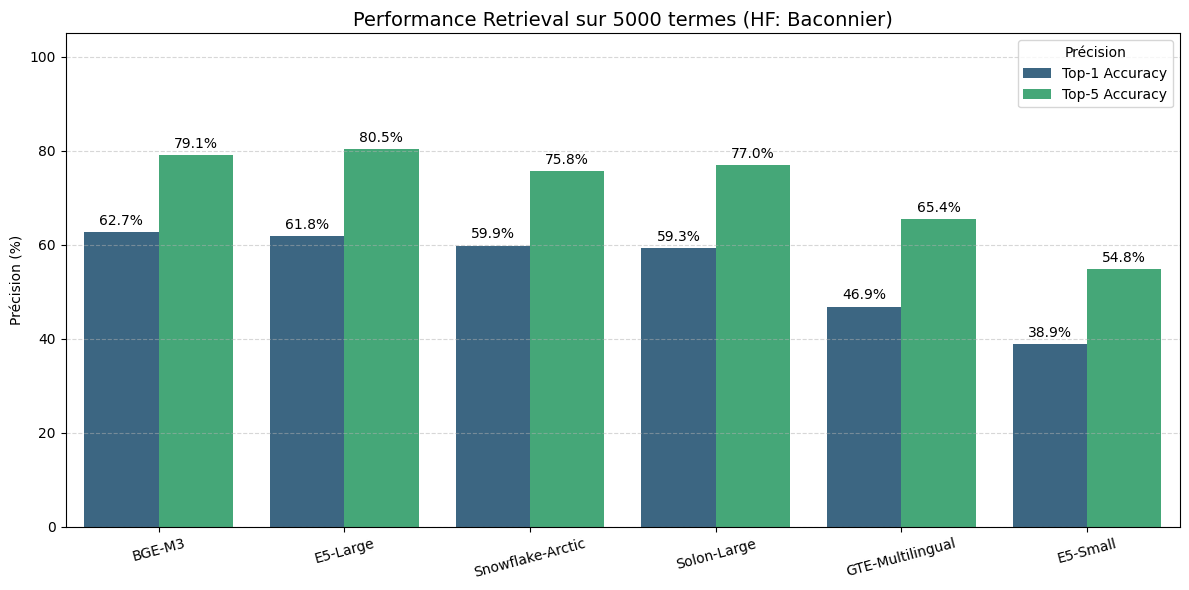

In [ ]:
# ==========================================
# 🚀 BENCHMARK COMPLET - DATASET BERCY (LARGE SCALE)
# ==========================================

import os
import sys
import gc
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

# 1. SETUP
print("⏳ Initialisation...")
os.environ["WANDB_DISABLED"] = "true"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

def install(package):
    os.system(f'{sys.executable} -m pip install -q {package}')

try:
    import datasets
    from sentence_transformers import SentenceTransformer, util
    from transformers import AutoModel, AutoTokenizer, AutoConfig
except ImportError:
    print("   📦 Installation des dépendances...")
    install('sentence-transformers datasets pandas matplotlib seaborn scikit-learn')
    import datasets
    from sentence_transformers import SentenceTransformer, util
    from transformers import AutoModel, AutoTokenizer, AutoConfig

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"✅ Mode : {'GPU 🚀' if DEVICE == 'cuda' else 'CPU 🐢'}")

# CONFIGURATION ÉTENDUE
MAX_SAMPLES = 5000  # ⬆️ Augmenté à 5000 pour un test statistique robuste

# ==========================================
# 2. CLASSE WRAPPER POUR SNOWFLAKE (Hugging Face Native)
# ==========================================
class SnowflakeWrapper:
    """
    Wrapper pour utiliser Snowflake avec transformers natif
    tout en gardant la compatibilité avec le reste du script.
    """
    def __init__(self, model_name):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        # On charge la config pour désactiver xformers si besoin
        config = AutoConfig.from_pretrained(model_name, trust_remote_code=True)
        config.use_memory_efficient_attention = False # Fix anti-crash
        config.unpad_inputs = False

        self.model = AutoModel.from_pretrained(
            model_name,
            config=config,
            add_pooling_layer=False,
            trust_remote_code=True
        ).to(DEVICE)
        self.model.eval()

    def encode(self, sentences, prompt_name=None, batch_size=32, convert_to_tensor=True, show_progress_bar=False):
        """Imite la méthode encode de SentenceTransformer"""

        # Gestion du préfixe 'query' spécifique à Snowflake
        prefix = 'query: ' if prompt_name == "query" else ''
        inputs = [prefix + s for s in sentences]

        all_embeddings = []

        # Traitement par batch pour ne pas saturer la mémoire
        for i in range(0, len(inputs), batch_size):
            batch_texts = inputs[i : i + batch_size]

            # Tokenisation
            batch_tokens = self.tokenizer(
                batch_texts,
                padding=True,
                truncation=True,
                return_tensors='pt',
                max_length=512
            ).to(DEVICE)

            with torch.no_grad():
                # Calcul des embeddings
                outputs = self.model(**batch_tokens)
                # CLS Pooling (premier token)
                embeddings = outputs[0][:, 0]
                # Normalisation
                embeddings = torch.nn.functional.normalize(embeddings, p=2, dim=1)
                all_embeddings.append(embeddings)

        # Concaténation finale
        if all_embeddings:
            return torch.cat(all_embeddings, dim=0)
        else:
            return torch.tensor([]).to(DEVICE)

# ==========================================
# 3. CHARGEMENT DATASET
# ==========================================
print("\n📥 Chargement du dataset...")
try:
    dataset = datasets.load_dataset("baconnier/administration_multi-term-dataset", split="train")
    cols = dataset.column_names
    # Détection colonnes
    col_terme = next((c for c in cols if 'term' in c.lower() or 'mot' in c.lower()), cols[0])
    col_def = next((c for c in cols if 'def' in c.lower() or 'desc' in c.lower()), cols[1] if len(cols)>1 else cols[0])

    FULL_QA = []
    for row in dataset:
        t = str(row[col_terme]).strip()
        d = str(row[col_def]).strip()
        if t and d:
            FULL_QA.append((f"C'est quoi {t} ?", d))

    if MAX_SAMPLES and len(FULL_QA) > MAX_SAMPLES:
        DATASET_QA = random.sample(FULL_QA, MAX_SAMPLES)
        print(f"   ✂️ Échantillon : {len(DATASET_QA)} paires (sélectionnées aléatoirement sur {len(FULL_QA)}).")
    else:
        DATASET_QA = FULL_QA
        print(f"   ✅ Dataset complet : {len(DATASET_QA)} paires.")

except Exception as e:
    print(f"❌ Erreur Dataset : {e}")
    DATASET_QA = []

# ==========================================
# 4. CANDIDATS
# ==========================================
CANDIDATS = [
    {"name": "Solon-Large", "id": "OrdalieTech/SOLON-embeddings-large-0.1"},
    {"name": "Snowflake-Arctic", "id": "Snowflake/snowflake-arctic-embed-m-v2.0"}, # Sera géré par le Wrapper
    {"name": "BGE-M3", "id": "BAAI/bge-m3"},
    {"name": "E5-Large", "id": "intfloat/multilingual-e5-large"},
    {"name": "GTE-Multilingual", "id": "Alibaba-NLP/gte-multilingual-base", "trust": True},
    {"name": "E5-Small", "id": "intfloat/multilingual-e5-small"},
]

# ==========================================
# 5. MOTEUR DE TEST
# ==========================================
def load_model_smart(cand):
    print(f"⚙️  Chargement : {cand['name']}...")
    try:
        # Si c'est Snowflake, on utilise NOTRE wrapper custom
        if "Snowflake" in cand['name']:
            return SnowflakeWrapper(cand['id'])

        # Sinon, méthode standard sentence-transformers
        else:
            kw = {"torch_dtype": torch.float16} if DEVICE == "cuda" else {}
            trust = cand.get('trust', False)
            return SentenceTransformer(cand['id'], trust_remote_code=trust, device=DEVICE, model_kwargs=kw)

    except Exception as e:
        print(f"   ❌ Erreur Load : {e}")
        return None

def run_benchmark(model, model_name):
    questions = [x[0] for x in DATASET_QA]
    documents = [x[1] for x in DATASET_QA]

    # --- ENCODAGE (Batch size 32 pour la vitesse) ---
    BATCH_SIZE = 32

    # A. Questions
    if "Snowflake" in model_name:
        emb_q = model.encode(questions, prompt_name="query", batch_size=BATCH_SIZE, show_progress_bar=True)
    elif "E5" in model_name:
        emb_q = model.encode(["query: " + q for q in questions], convert_to_tensor=True, batch_size=BATCH_SIZE, show_progress_bar=True)
    else:
        emb_q = model.encode(questions, convert_to_tensor=True, batch_size=BATCH_SIZE, show_progress_bar=True)

    # B. Documents
    if "E5" in model_name:
        emb_d = model.encode(["passage: " + d for d in documents], convert_to_tensor=True, batch_size=BATCH_SIZE, show_progress_bar=True)
    else:
        emb_d = model.encode(documents, convert_to_tensor=True, batch_size=BATCH_SIZE, show_progress_bar=True)

    # --- SIMILARITÉ & MÉTRIQUES ---
    # Pour 5000x5000, la matrice tient en mémoire (~100MB)
    scores_matrix = util.cos_sim(emb_q, emb_d)

    top1 = 0
    top5 = 0
    n = len(questions)

    # Calcul rapide sur CPU pour éviter les transferts
    if DEVICE == "cuda":
        scores_matrix = scores_matrix.cpu()

    for i in range(n):
        # On cherche les 5 meilleures réponses pour la question i
        # topk est très optimisé
        best_indices = torch.topk(scores_matrix[i], k=5).indices.tolist()

        if i == best_indices[0]: top1 += 1
        if i in best_indices: top5 += 1

    return (top1 / n) * 100, (top5 / n) * 100

# ==========================================
# 6. EXÉCUTION & GRAPHIQUE
# ==========================================
results = []

if DATASET_QA:
    print(f"\n🚀 Démarrage du Benchmark Large Echelle...")

    for cand in CANDIDATS:
        gc.collect()
        torch.cuda.empty_cache()

        model = load_model_smart(cand)

        if model:
            acc1, acc5 = run_benchmark(model, cand['name'])
            print(f"   📊 {cand['name']} -> Top-1: {acc1:.1f}% | Top-5: {acc5:.1f}%")

            results.append({
                "Modèle": cand['name'],
                "Top-1 Accuracy": acc1,
                "Top-5 Accuracy": acc5
            })

        del model
        gc.collect()
        torch.cuda.empty_cache()

    # ==========================================
    # 7. AFFICHAGE DES RÉSULTATS
    # ==========================================
    if results:
        df = pd.DataFrame(results)

        # Tableau
        print("\n🏆 CLASSEMENT FINAL 🏆")
        df_sorted = df.sort_values(by="Top-1 Accuracy", ascending=False)
        print(df_sorted.to_markdown(index=False, floatfmt=".1f"))

        # Transformation pour le graphique groupé
        df_melted = df_sorted.melt(id_vars=["Modèle"],
                                   value_vars=["Top-1 Accuracy", "Top-5 Accuracy"],
                                   var_name="Métrique",
                                   value_name="Précision (%)")

        # Graphique
        plt.figure(figsize=(12, 6))

        # Palette : Top-1 en foncé, Top-5 en clair
        palette = {"Top-1 Accuracy": "#1f77b4", "Top-5 Accuracy": "#aec7e8"}

        ax = sns.barplot(
            data=df_melted,
            x="Modèle",
            y="Précision (%)",
            hue="Métrique",
            palette="viridis"
        )

        plt.title(f"Performance Retrieval sur {len(DATASET_QA)} termes (HF: Baconnier)", fontsize=14)
        plt.ylim(0, 105)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.legend(title="Précision")
        plt.xlabel("")
        plt.xticks(rotation=15)

        # Annotation des barres
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', padding=3)

        plt.tight_layout()
        plt.show()

    else:
        print("❌ Aucun résultat valide.")
else:
    print("❌ Erreur : Dataset vide.")

# **Test des modèles sur 10000 échantillons**

⏳ Initialisation...
✅ Mode : GPU 🚀

📥 Chargement du dataset...
   ✂️ Échantillon : 10000 paires (sélectionnées aléatoirement sur 135020).

🚀 Démarrage du Benchmark Large Echelle...
⚙️  Chargement : Solon-Large...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

   📊 Solon-Large -> Top-1: 52.3% | Top-5: 72.2%
⚙️  Chargement : Snowflake-Arctic...
   📊 Snowflake-Arctic -> Top-1: 53.0% | Top-5: 70.9%
⚙️  Chargement : BGE-M3...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

   📊 BGE-M3 -> Top-1: 54.1% | Top-5: 73.1%
⚙️  Chargement : E5-Large...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

   📊 E5-Large -> Top-1: 53.9% | Top-5: 74.5%
⚙️  Chargement : GTE-Multilingual...


Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

   📊 GTE-Multilingual -> Top-1: 40.2% | Top-5: 58.7%
⚙️  Chargement : E5-Small...


Batches:   0%|          | 0/313 [00:00<?, ?it/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

   📊 E5-Small -> Top-1: 31.7% | Top-5: 49.5%

🏆 CLASSEMENT FINAL 🏆
| Modèle           |   Top-1 Accuracy |   Top-5 Accuracy |
|:-----------------|-----------------:|-----------------:|
| BGE-M3           |             54.1 |             73.1 |
| E5-Large         |             53.9 |             74.5 |
| Snowflake-Arctic |             53.0 |             70.9 |
| Solon-Large      |             52.3 |             72.2 |
| GTE-Multilingual |             40.2 |             58.7 |
| E5-Small         |             31.7 |             49.5 |


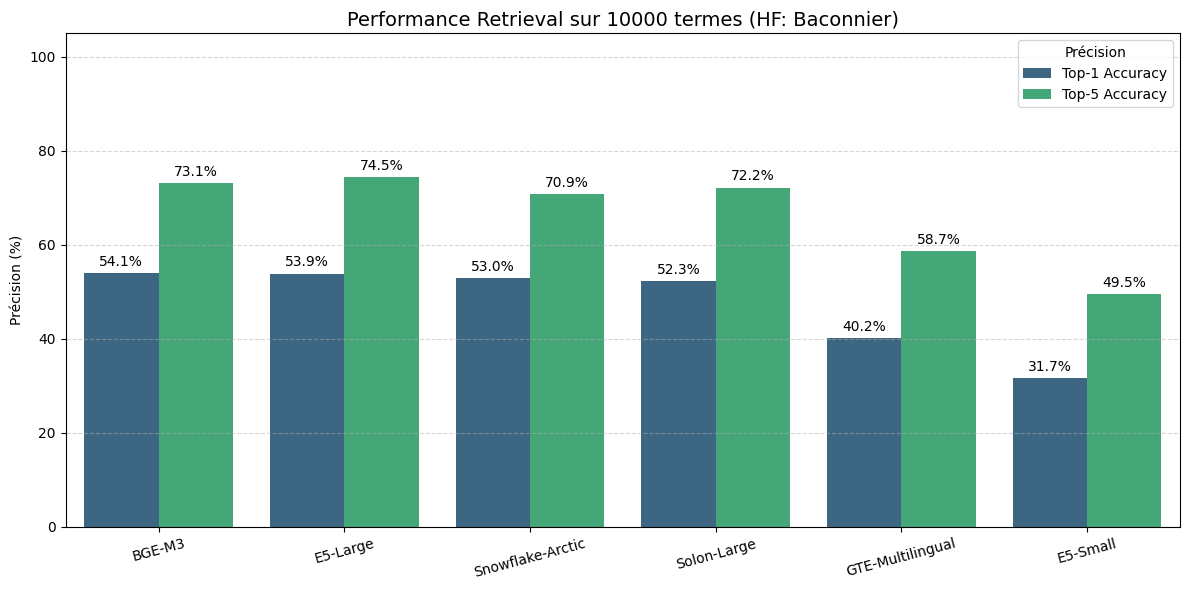

In [ ]:
# ==========================================
# 🚀 BENCHMARK COMPLET - DATASET BERCY (LARGE SCALE)
# ==========================================

import os
import sys
import gc
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

# 1. SETUP
print("⏳ Initialisation...")
os.environ["WANDB_DISABLED"] = "true"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

def install(package):
    os.system(f'{sys.executable} -m pip install -q {package}')

try:
    import datasets
    from sentence_transformers import SentenceTransformer, util
    from transformers import AutoModel, AutoTokenizer, AutoConfig
except ImportError:
    print("   📦 Installation des dépendances...")
    install('sentence-transformers datasets pandas matplotlib seaborn scikit-learn')
    import datasets
    from sentence_transformers import SentenceTransformer, util
    from transformers import AutoModel, AutoTokenizer, AutoConfig

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"✅ Mode : {'GPU 🚀' if DEVICE == 'cuda' else 'CPU 🐢'}")

# CONFIGURATION ÉTENDUE
MAX_SAMPLES = 10000  # ⬆️ Augmenté à 10000 pour un test statistique robuste

# ==========================================
# 2. CLASSE WRAPPER POUR SNOWFLAKE (Hugging Face Native)
# ==========================================
class SnowflakeWrapper:
    """
    Wrapper pour utiliser Snowflake avec transformers natif
    tout en gardant la compatibilité avec le reste du script.
    """
    def __init__(self, model_name):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        # On charge la config pour désactiver xformers si besoin
        config = AutoConfig.from_pretrained(model_name, trust_remote_code=True)
        config.use_memory_efficient_attention = False # Fix anti-crash
        config.unpad_inputs = False

        self.model = AutoModel.from_pretrained(
            model_name,
            config=config,
            add_pooling_layer=False,
            trust_remote_code=True
        ).to(DEVICE)
        self.model.eval()

    def encode(self, sentences, prompt_name=None, batch_size=32, convert_to_tensor=True, show_progress_bar=False):
        """Imite la méthode encode de SentenceTransformer"""

        # Gestion du préfixe 'query' spécifique à Snowflake
        prefix = 'query: ' if prompt_name == "query" else ''
        inputs = [prefix + s for s in sentences]

        all_embeddings = []

        # Traitement par batch pour ne pas saturer la mémoire
        for i in range(0, len(inputs), batch_size):
            batch_texts = inputs[i : i + batch_size]

            # Tokenisation
            batch_tokens = self.tokenizer(
                batch_texts,
                padding=True,
                truncation=True,
                return_tensors='pt',
                max_length=512
            ).to(DEVICE)

            with torch.no_grad():
                # Calcul des embeddings
                outputs = self.model(**batch_tokens)
                # CLS Pooling (premier token)
                embeddings = outputs[0][:, 0]
                # Normalisation
                embeddings = torch.nn.functional.normalize(embeddings, p=2, dim=1)
                all_embeddings.append(embeddings)

        # Concaténation finale
        if all_embeddings:
            return torch.cat(all_embeddings, dim=0)
        else:
            return torch.tensor([]).to(DEVICE)

# ==========================================
# 3. CHARGEMENT DATASET
# ==========================================
print("\n📥 Chargement du dataset...")
try:
    dataset = datasets.load_dataset("baconnier/administration_multi-term-dataset", split="train")
    cols = dataset.column_names
    # Détection colonnes
    col_terme = next((c for c in cols if 'term' in c.lower() or 'mot' in c.lower()), cols[0])
    col_def = next((c for c in cols if 'def' in c.lower() or 'desc' in c.lower()), cols[1] if len(cols)>1 else cols[0])

    FULL_QA = []
    for row in dataset:
        t = str(row[col_terme]).strip()
        d = str(row[col_def]).strip()
        if t and d:
            FULL_QA.append((f"C'est quoi {t} ?", d))

    if MAX_SAMPLES and len(FULL_QA) > MAX_SAMPLES:
        DATASET_QA = random.sample(FULL_QA, MAX_SAMPLES)
        print(f"   ✂️ Échantillon : {len(DATASET_QA)} paires (sélectionnées aléatoirement sur {len(FULL_QA)}).")
    else:
        DATASET_QA = FULL_QA
        print(f"   ✅ Dataset complet : {len(DATASET_QA)} paires.")

except Exception as e:
    print(f"❌ Erreur Dataset : {e}")
    DATASET_QA = []

# ==========================================
# 4. CANDIDATS
# ==========================================
CANDIDATS = [
    {"name": "Solon-Large", "id": "OrdalieTech/SOLON-embeddings-large-0.1"},
    {"name": "Snowflake-Arctic", "id": "Snowflake/snowflake-arctic-embed-m-v2.0"}, # Sera géré par le Wrapper
    {"name": "BGE-M3", "id": "BAAI/bge-m3"},
    {"name": "E5-Large", "id": "intfloat/multilingual-e5-large"},
    {"name": "GTE-Multilingual", "id": "Alibaba-NLP/gte-multilingual-base", "trust": True},
    {"name": "E5-Small", "id": "intfloat/multilingual-e5-small"},
]

# ==========================================
# 5. MOTEUR DE TEST
# ==========================================
def load_model_smart(cand):
    print(f"⚙️  Chargement : {cand['name']}...")
    try:
        # Si c'est Snowflake, on utilise NOTRE wrapper custom
        if "Snowflake" in cand['name']:
            return SnowflakeWrapper(cand['id'])

        # Sinon, méthode standard sentence-transformers
        else:
            kw = {"torch_dtype": torch.float16} if DEVICE == "cuda" else {}
            trust = cand.get('trust', False)
            return SentenceTransformer(cand['id'], trust_remote_code=trust, device=DEVICE, model_kwargs=kw)

    except Exception as e:
        print(f"   ❌ Erreur Load : {e}")
        return None

def run_benchmark(model, model_name):
    questions = [x[0] for x in DATASET_QA]
    documents = [x[1] for x in DATASET_QA]

    # --- ENCODAGE (Batch size 32 pour la vitesse) ---
    BATCH_SIZE = 32

    # A. Questions
    if "Snowflake" in model_name:
        emb_q = model.encode(questions, prompt_name="query", batch_size=BATCH_SIZE, show_progress_bar=True)
    elif "E5" in model_name:
        emb_q = model.encode(["query: " + q for q in questions], convert_to_tensor=True, batch_size=BATCH_SIZE, show_progress_bar=True)
    else:
        emb_q = model.encode(questions, convert_to_tensor=True, batch_size=BATCH_SIZE, show_progress_bar=True)

    # B. Documents
    if "E5" in model_name:
        emb_d = model.encode(["passage: " + d for d in documents], convert_to_tensor=True, batch_size=BATCH_SIZE, show_progress_bar=True)
    else:
        emb_d = model.encode(documents, convert_to_tensor=True, batch_size=BATCH_SIZE, show_progress_bar=True)

    # --- SIMILARITÉ & MÉTRIQUES ---
    # Pour 5000x5000, la matrice tient en mémoire (~100MB)
    scores_matrix = util.cos_sim(emb_q, emb_d)

    top1 = 0
    top5 = 0
    n = len(questions)

    # Calcul rapide sur CPU pour éviter les transferts
    if DEVICE == "cuda":
        scores_matrix = scores_matrix.cpu()

    for i in range(n):
        # On cherche les 5 meilleures réponses pour la question i
        # topk est très optimisé
        best_indices = torch.topk(scores_matrix[i], k=5).indices.tolist()

        if i == best_indices[0]: top1 += 1
        if i in best_indices: top5 += 1

    return (top1 / n) * 100, (top5 / n) * 100

# ==========================================
# 6. EXÉCUTION & GRAPHIQUE
# ==========================================
results = []

if DATASET_QA:
    print(f"\n🚀 Démarrage du Benchmark Large Echelle...")

    for cand in CANDIDATS:
        gc.collect()
        torch.cuda.empty_cache()

        model = load_model_smart(cand)

        if model:
            acc1, acc5 = run_benchmark(model, cand['name'])
            print(f"   📊 {cand['name']} -> Top-1: {acc1:.1f}% | Top-5: {acc5:.1f}%")

            results.append({
                "Modèle": cand['name'],
                "Top-1 Accuracy": acc1,
                "Top-5 Accuracy": acc5
            })

        del model
        gc.collect()
        torch.cuda.empty_cache()

    # ==========================================
    # 7. AFFICHAGE DES RÉSULTATS
    # ==========================================
    if results:
        df = pd.DataFrame(results)

        # Tableau
        print("\n🏆 CLASSEMENT FINAL 🏆")
        df_sorted = df.sort_values(by="Top-1 Accuracy", ascending=False)
        print(df_sorted.to_markdown(index=False, floatfmt=".1f"))

        # Transformation pour le graphique groupé
        df_melted = df_sorted.melt(id_vars=["Modèle"],
                                   value_vars=["Top-1 Accuracy", "Top-5 Accuracy"],
                                   var_name="Métrique",
                                   value_name="Précision (%)")

        # Graphique
        plt.figure(figsize=(12, 6))

        # Palette : Top-1 en foncé, Top-5 en clair
        palette = {"Top-1 Accuracy": "#1f77b4", "Top-5 Accuracy": "#aec7e8"}

        ax = sns.barplot(
            data=df_melted,
            x="Modèle",
            y="Précision (%)",
            hue="Métrique",
            palette="viridis"
        )

        plt.title(f"Performance Retrieval sur {len(DATASET_QA)} termes (HF: Baconnier)", fontsize=14)
        plt.ylim(0, 105)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.legend(title="Précision")
        plt.xlabel("")
        plt.xticks(rotation=15)

        # Annotation des barres
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', padding=3)

        plt.tight_layout()
        plt.show()

    else:
        print("❌ Aucun résultat valide.")
else:
    print("❌ Erreur : Dataset vide.")

Meme chose avec 50 000 termes

In [ ]:
# ==========================================
# 🚀 BENCHMARK COMPLET - DATASET BERCY (LARGE SCALE)
# ==========================================

import os
import sys
import gc
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

# 1. SETUP
print("⏳ Initialisation...")
os.environ["WANDB_DISABLED"] = "true"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

def install(package):
    os.system(f'{sys.executable} -m pip install -q {package}')

try:
    import datasets
    from sentence_transformers import SentenceTransformer, util
    from transformers import AutoModel, AutoTokenizer, AutoConfig
except ImportError:
    print("   📦 Installation des dépendances...")
    install('sentence-transformers datasets pandas matplotlib seaborn scikit-learn')
    import datasets
    from sentence_transformers import SentenceTransformer, util
    from transformers import AutoModel, AutoTokenizer, AutoConfig

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"✅ Mode : {'GPU 🚀' if DEVICE == 'cuda' else 'CPU 🐢'}")

# CONFIGURATION ÉTENDUE
MAX_SAMPLES = 50000  # ⬆️ Augmenté à 10000 pour un test statistique robuste

# ==========================================
# 2. CLASSE WRAPPER POUR SNOWFLAKE (Hugging Face Native)
# ==========================================
class SnowflakeWrapper:
    """
    Wrapper pour utiliser Snowflake avec transformers natif
    tout en gardant la compatibilité avec le reste du script.
    """
    def __init__(self, model_name):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        # On charge la config pour désactiver xformers si besoin
        config = AutoConfig.from_pretrained(model_name, trust_remote_code=True)
        config.use_memory_efficient_attention = False # Fix anti-crash
        config.unpad_inputs = False

        self.model = AutoModel.from_pretrained(
            model_name,
            config=config,
            add_pooling_layer=False,
            trust_remote_code=True
        ).to(DEVICE)
        self.model.eval()

    def encode(self, sentences, prompt_name=None, batch_size=32, convert_to_tensor=True, show_progress_bar=False):
        """Imite la méthode encode de SentenceTransformer"""

        # Gestion du préfixe 'query' spécifique à Snowflake
        prefix = 'query: ' if prompt_name == "query" else ''
        inputs = [prefix + s for s in sentences]

        all_embeddings = []

        # Traitement par batch pour ne pas saturer la mémoire
        for i in range(0, len(inputs), batch_size):
            batch_texts = inputs[i : i + batch_size]

            # Tokenisation
            batch_tokens = self.tokenizer(
                batch_texts,
                padding=True,
                truncation=True,
                return_tensors='pt',
                max_length=512
            ).to(DEVICE)

            with torch.no_grad():
                # Calcul des embeddings
                outputs = self.model(**batch_tokens)
                # CLS Pooling (premier token)
                embeddings = outputs[0][:, 0]
                # Normalisation
                embeddings = torch.nn.functional.normalize(embeddings, p=2, dim=1)
                all_embeddings.append(embeddings)

        # Concaténation finale
        if all_embeddings:
            return torch.cat(all_embeddings, dim=0)
        else:
            return torch.tensor([]).to(DEVICE)

# ==========================================
# 3. CHARGEMENT DATASET
# ==========================================
print("\n📥 Chargement du dataset...")
try:
    dataset = datasets.load_dataset("baconnier/administration_multi-term-dataset", split="train")
    cols = dataset.column_names
    # Détection colonnes
    col_terme = next((c for c in cols if 'term' in c.lower() or 'mot' in c.lower()), cols[0])
    col_def = next((c for c in cols if 'def' in c.lower() or 'desc' in c.lower()), cols[1] if len(cols)>1 else cols[0])

    FULL_QA = []
    for row in dataset:
        t = str(row[col_terme]).strip()
        d = str(row[col_def]).strip()
        if t and d:
            FULL_QA.append((f"C'est quoi {t} ?", d))

    if MAX_SAMPLES and len(FULL_QA) > MAX_SAMPLES:
        DATASET_QA = random.sample(FULL_QA, MAX_SAMPLES)
        print(f"   ✂️ Échantillon : {len(DATASET_QA)} paires (sélectionnées aléatoirement sur {len(FULL_QA)}).")
    else:
        DATASET_QA = FULL_QA
        print(f"   ✅ Dataset complet : {len(DATASET_QA)} paires.")

except Exception as e:
    print(f"❌ Erreur Dataset : {e}")
    DATASET_QA = []

# ==========================================
# 4. CANDIDATS
# ==========================================
CANDIDATS = [
    {"name": "Solon-Large", "id": "OrdalieTech/SOLON-embeddings-large-0.1"},
    {"name": "Snowflake-Arctic", "id": "Snowflake/snowflake-arctic-embed-m-v2.0"}, # Sera géré par le Wrapper
    {"name": "BGE-M3", "id": "BAAI/bge-m3"},
    {"name": "E5-Large", "id": "intfloat/multilingual-e5-large"},
    {"name": "GTE-Multilingual", "id": "Alibaba-NLP/gte-multilingual-base", "trust": True},
    {"name": "E5-Small", "id": "intfloat/multilingual-e5-small"},
]

# ==========================================
# 5. MOTEUR DE TEST
# ==========================================
def load_model_smart(cand):
    print(f"⚙️  Chargement : {cand['name']}...")
    try:
        # Si c'est Snowflake, on utilise NOTRE wrapper custom
        if "Snowflake" in cand['name']:
            return SnowflakeWrapper(cand['id'])

        # Sinon, méthode standard sentence-transformers
        else:
            kw = {"torch_dtype": torch.float16} if DEVICE == "cuda" else {}
            trust = cand.get('trust', False)
            return SentenceTransformer(cand['id'], trust_remote_code=trust, device=DEVICE, model_kwargs=kw)

    except Exception as e:
        print(f"   ❌ Erreur Load : {e}")
        return None

def run_benchmark(model, model_name):
    questions = [x[0] for x in DATASET_QA]
    documents = [x[1] for x in DATASET_QA]

    # --- ENCODAGE (Batch size 32 pour la vitesse) ---
    BATCH_SIZE = 32

    # A. Questions
    if "Snowflake" in model_name:
        emb_q = model.encode(questions, prompt_name="query", batch_size=BATCH_SIZE, show_progress_bar=True)
    elif "E5" in model_name:
        emb_q = model.encode(["query: " + q for q in questions], convert_to_tensor=True, batch_size=BATCH_SIZE, show_progress_bar=True)
    else:
        emb_q = model.encode(questions, convert_to_tensor=True, batch_size=BATCH_SIZE, show_progress_bar=True)

    # B. Documents
    if "E5" in model_name:
        emb_d = model.encode(["passage: " + d for d in documents], convert_to_tensor=True, batch_size=BATCH_SIZE, show_progress_bar=True)
    else:
        emb_d = model.encode(documents, convert_to_tensor=True, batch_size=BATCH_SIZE, show_progress_bar=True)

    # --- SIMILARITÉ & MÉTRIQUES ---
    # Pour 5000x5000, la matrice tient en mémoire (~100MB)
    scores_matrix = util.cos_sim(emb_q, emb_d)

    top1 = 0
    top5 = 0
    n = len(questions)

    # Calcul rapide sur CPU pour éviter les transferts
    if DEVICE == "cuda":
        scores_matrix = scores_matrix.cpu()

    for i in range(n):
        # On cherche les 5 meilleures réponses pour la question i
        # topk est très optimisé
        best_indices = torch.topk(scores_matrix[i], k=5).indices.tolist()

        if i == best_indices[0]: top1 += 1
        if i in best_indices: top5 += 1

    return (top1 / n) * 100, (top5 / n) * 100

# ==========================================
# 6. EXÉCUTION & GRAPHIQUE
# ==========================================
results = []

if DATASET_QA:
    print(f"\n🚀 Démarrage du Benchmark Large Echelle...")

    for cand in CANDIDATS:
        gc.collect()
        torch.cuda.empty_cache()

        model = load_model_smart(cand)

        if model:
            acc1, acc5 = run_benchmark(model, cand['name'])
            print(f"   📊 {cand['name']} -> Top-1: {acc1:.1f}% | Top-5: {acc5:.1f}%")

            results.append({
                "Modèle": cand['name'],
                "Top-1 Accuracy": acc1,
                "Top-5 Accuracy": acc5
            })

        del model
        gc.collect()
        torch.cuda.empty_cache()

    # ==========================================
    # 7. AFFICHAGE DES RÉSULTATS
    # ==========================================
    if results:
        df = pd.DataFrame(results)

        # Tableau
        print("\n🏆 CLASSEMENT FINAL 🏆")
        df_sorted = df.sort_values(by="Top-1 Accuracy", ascending=False)
        print(df_sorted.to_markdown(index=False, floatfmt=".1f"))

        # Transformation pour le graphique groupé
        df_melted = df_sorted.melt(id_vars=["Modèle"],
                                   value_vars=["Top-1 Accuracy", "Top-5 Accuracy"],
                                   var_name="Métrique",
                                   value_name="Précision (%)")

        # Graphique
        plt.figure(figsize=(12, 6))

        # Palette : Top-1 en foncé, Top-5 en clair
        palette = {"Top-1 Accuracy": "#1f77b4", "Top-5 Accuracy": "#aec7e8"}

        ax = sns.barplot(
            data=df_melted,
            x="Modèle",
            y="Précision (%)",
            hue="Métrique",
            palette="viridis"
        )

        plt.title(f"Performance Retrieval sur {len(DATASET_QA)} termes (HF: Baconnier)", fontsize=14)
        plt.ylim(0, 105)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.legend(title="Précision")
        plt.xlabel("")
        plt.xticks(rotation=15)

        # Annotation des barres
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', padding=3)

        plt.tight_layout()
        plt.show()

    else:
        print("❌ Aucun résultat valide.")
else:
    print("❌ Erreur : Dataset vide.")

⏳ Initialisation...
✅ Mode : GPU 🚀

📥 Chargement du dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


   ✂️ Échantillon : 50000 paires (sélectionnées aléatoirement sur 135020).

🚀 Démarrage du Benchmark Large Echelle...
⚙️  Chargement : Solon-Large...


`torch_dtype` is deprecated! Use `dtype` instead!


Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

   📊 Solon-Large -> Top-1: 31.3% | Top-5: 58.3%
⚙️  Chargement : Snowflake-Arctic...
   📊 Snowflake-Arctic -> Top-1: 32.1% | Top-5: 58.8%
⚙️  Chargement : BGE-M3...


Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

   📊 BGE-M3 -> Top-1: 33.2% | Top-5: 61.1%
⚙️  Chargement : E5-Large...


Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

   📊 E5-Large -> Top-1: 32.4% | Top-5: 61.2%
⚙️  Chargement : GTE-Multilingual...


Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

# **Test des modèles sur l'intégralité du dataset**

In [ ]:
# ==========================================
# 🚀 BENCHMARK COMPLET - DATASET BERCY (10k Samples)
# ==========================================

import os
import sys
import gc
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

# 1. SETUP
print("⏳ Initialisation...")
os.environ["WANDB_DISABLED"] = "true"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

def install(package):
    os.system(f'{sys.executable} -m pip install -q {package}')

try:
    import datasets
    from sentence_transformers import SentenceTransformer, util
    from transformers import AutoModel, AutoTokenizer, AutoConfig
except ImportError:
    print("   📦 Installation des dépendances...")
    install('sentence-transformers datasets pandas matplotlib seaborn scikit-learn')
    import datasets
    from sentence_transformers import SentenceTransformer, util
    from transformers import AutoModel, AutoTokenizer, AutoConfig

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"✅ Mode : {'GPU 🚀' if DEVICE == 'cuda' else 'CPU 🐢'}")

# CONFIGURATION ÉTENDUE
MAX_SAMPLES = None  # Test sur TOUT le dataset (None)

# ==========================================
# 2. CLASSE WRAPPER POUR SNOWFLAKE (Correction xformers)
# ==========================================
class SnowflakeWrapper:
    """
    Wrapper robuste pour Snowflake qui force la désactivation de xformers
    et imite le comportement de SentenceTransformer pour le benchmark.
    """
    def __init__(self, model_name):
        print(f"   ⚙️ [SnowflakeWrapper] Initialisation manuelle de {model_name}...")
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)

        # 1. Chargement et modification forcée de la config
        config = AutoConfig.from_pretrained(model_name, trust_remote_code=True)
        config.use_memory_efficient_attention = False # CRITIQUE : Désactive xformers
        config.unpad_inputs = False

        # 2. Chargement du modèle avec la config modifiée ET les kwargs de sécurité
        self.model = AutoModel.from_pretrained(
            model_name,
            config=config,
            add_pooling_layer=False,
            trust_remote_code=True,
            use_memory_efficient_attention=False, # Double sécurité
            unpad_inputs=False
        ).to(DEVICE)
        self.model.eval()

    def encode(self, sentences, prompt_name=None, batch_size=32, convert_to_tensor=True, show_progress_bar=False):
        """Encode les phrases avec la gestion des prompts spécifique à Snowflake"""

        # Gestion du préfixe
        prefix = 'query: ' if prompt_name == "query" else ''
        inputs = [prefix + s for s in sentences]

        all_embeddings = []

        # Batching manuel
        total = len(inputs)
        for i in range(0, total, batch_size):
            batch_texts = inputs[i : i + batch_size]

            # Tokenisation
            batch_tokens = self.tokenizer(
                batch_texts,
                padding=True,
                truncation=True,
                return_tensors='pt',
                max_length=512
            ).to(DEVICE)

            with torch.no_grad():
                outputs = self.model(**batch_tokens)
                # CLS Pooling (Snowflake standard)
                embeddings = outputs[0][:, 0]
                # Normalisation L2
                embeddings = torch.nn.functional.normalize(embeddings, p=2, dim=1)
                all_embeddings.append(embeddings)

        if all_embeddings:
            return torch.cat(all_embeddings, dim=0)
        else:
            return torch.tensor([]).to(DEVICE)

# ==========================================
# 3. CHARGEMENT DATASET
# ==========================================
print("\n📥 Chargement du dataset...")
try:
    dataset = datasets.load_dataset("baconnier/administration_multi-term-dataset", split="train")
    cols = dataset.column_names
    col_terme = next((c for c in cols if 'term' in c.lower() or 'mot' in c.lower()), cols[0])
    col_def = next((c for c in cols if 'def' in c.lower() or 'desc' in c.lower()), cols[1] if len(cols)>1 else cols[0])

    FULL_QA = []
    for row in dataset:
        t = str(row[col_terme]).strip()
        d = str(row[col_def]).strip()
        if t and d:
            FULL_QA.append((f"C'est quoi {t} ?", d))

    if MAX_SAMPLES and len(FULL_QA) > MAX_SAMPLES:
        DATASET_QA = random.sample(FULL_QA, MAX_SAMPLES)
        print(f"   ✂️ Échantillon : {len(DATASET_QA)} paires.")
    else:
        DATASET_QA = FULL_QA
        print(f"   ✅ Dataset complet : {len(DATASET_QA)} paires.")

except Exception as e:
    print(f"❌ Erreur Dataset : {e}")
    DATASET_QA = []

# ==========================================
# 4. LISTE DES CANDIDATS (UNIQUEMENT SOLON)
# ==========================================
CANDIDATS = [
    {"name": "Solon-Large", "id": "OrdalieTech/SOLON-embeddings-large-0.1"},
]

# ==========================================
# 5. MOTEUR DE CHARGEMENT & TEST
# ==========================================
def load_model_smart(cand):
    print(f"⚙️  Chargement : {cand['name']}...")
    try:
        # A. Snowflake -> Wrapper Custom
        if "Snowflake" in cand['name']:
            return SnowflakeWrapper(cand['id'])

        # B. Solon & Marsilia -> Transformer + Pooling (Architecture BERT)
        elif "Solon" in cand['name'] or "Marsilia" in cand['name']:
            from sentence_transformers import models
            kw = {"torch_dtype": torch.float16} if DEVICE == "cuda" else {}
            word_emb = models.Transformer(cand['id'], model_args=kw)
            pooling = models.Pooling(word_emb.get_word_embedding_dimension(), pooling_mode='mean')
            return SentenceTransformer(modules=[word_emb, pooling], device=DEVICE)

        # C. Autres -> SentenceTransformer Standard
        else:
            kw = {"torch_dtype": torch.float16} if DEVICE == "cuda" else {}
            trust = cand.get('trust', False)
            return SentenceTransformer(cand['id'], trust_remote_code=trust, device=DEVICE, model_kwargs=kw)

    except Exception as e:
        print(f"   ❌ Erreur Load : {e}")
        return None

def run_benchmark(model, model_name):
    questions = [x[0] for x in DATASET_QA]
    documents = [x[1] for x in DATASET_QA]

    # --- ENCODAGE ---
    BATCH_SIZE = 32
    print(f"   🔹 Encodage des {len(questions)} paires...")

    # 1. Questions
    if "Snowflake" in model_name:
        emb_q = model.encode(questions, prompt_name="query", batch_size=BATCH_SIZE)
    elif "E5" in model_name:
        emb_q = model.encode(["query: " + q for q in questions], convert_to_tensor=True, batch_size=BATCH_SIZE)
    else:
        emb_q = model.encode(questions, convert_to_tensor=True, batch_size=BATCH_SIZE)

    # 2. Documents
    if "E5" in model_name:
        emb_d = model.encode(["passage: " + d for d in documents], convert_to_tensor=True, batch_size=BATCH_SIZE)
    else:
        emb_d = model.encode(documents, convert_to_tensor=True, batch_size=BATCH_SIZE)

    # --- SIMILARITÉ & MÉTRIQUES ---
    print("   🔹 Calcul des scores...")
    scores_matrix = util.cos_sim(emb_q, emb_d)

    # Transfert CPU pour l'analyse (plus rapide pour les boucles simples)
    if DEVICE == "cuda":
        scores_matrix = scores_matrix.cpu()

    top1 = 0
    top5 = 0
    n = len(questions)

    for i in range(n):
        # On cherche les 5 meilleures réponses
        best_indices = torch.topk(scores_matrix[i], k=5).indices.tolist()

        if i == best_indices[0]: top1 += 1
        if i in best_indices: top5 += 1

    return (top1 / n) * 100, (top5 / n) * 100

# ==========================================
# 6. EXÉCUTION & VISUALISATION
# ==========================================
results = []

if DATASET_QA:
    print(f"\n🚀 Démarrage du Benchmark Large Echelle...")

    for cand in CANDIDATS:
        gc.collect()
        torch.cuda.empty_cache()

        model = load_model_smart(cand)

        if model:
            acc1, acc5 = run_benchmark(model, cand['name'])
            print(f"   📊 {cand['name']} -> Top-1: {acc1:.1f}% | Top-5: {acc5:.1f}%")

            results.append({
                "Modèle": cand['name'],
                "Top-1 Accuracy": acc1,
                "Top-5 Accuracy": acc5
            })

        del model
        gc.collect()
        torch.cuda.empty_cache()

    # ==========================================
    # 7. GRAPHIQUE FINAL
    # ==========================================
    if results:
        df = pd.DataFrame(results)

        # Tableau Markdown
        print("\n🏆 CLASSEMENT FINAL 🏆")
        df_sorted = df.sort_values(by="Top-1 Accuracy", ascending=False)
        print(df_sorted.to_markdown(index=False, floatfmt=".1f"))

        # Transformation pour le graphique groupé
        df_melted = df_sorted.melt(id_vars=["Modèle"],
                                   value_vars=["Top-1 Accuracy", "Top-5 Accuracy"],
                                   var_name="Métrique",
                                   value_name="Précision (%)")

        # Graphique
        plt.figure(figsize=(12, 6))

        # Barplot groupé
        ax = sns.barplot(
            data=df_melted,
            x="Modèle",
            y="Précision (%)",
            hue="Métrique",
            palette="viridis"
        )

        plt.title(f"Comparatif Retrieval (Dataset: {len(DATASET_QA)} paires)", fontsize=14)
        plt.ylim(0, 105)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.legend(title="Métrique")
        plt.xlabel("")
        plt.xticks(rotation=15)

        # Valeurs sur les barres
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', padding=3)

        plt.tight_layout()
        plt.show()

    else:
        print("❌ Aucun résultat valide.")
else:
    print("❌ Erreur : Dataset vide.")

⏳ Initialisation...
✅ Mode : GPU 🚀

📥 Chargement du dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/55.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/135020 [00:00<?, ? examples/s]

   ✅ Dataset complet : 135020 paires.

🚀 Démarrage du Benchmark Large Echelle...
⚙️  Chargement : Solon-Large...


config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

   🔹 Encodage des 135020 paires...
   🔹 Calcul des scores...


OutOfMemoryError: CUDA out of memory. Tried to allocate 33.96 GiB. GPU 0 has a total capacity of 14.74 GiB of which 12.51 GiB is free. Process 5392 has 2.22 GiB memory in use. Of the allocated memory 2.08 GiB is allocated by PyTorch, and 16.25 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)